In [1]:
# librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

### Extracción del Archivo Tratado

In [2]:
datos = pd.read_csv('datos_limpios.csv') # cargar el dataset de los datos limpios del challenge anterior
datos.head() # mostrar las primeras 5 filas

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Daily_Accounts
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


### Eliminación de Columnas Irrelevantes

##### Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [3]:
# eliminar el customerID y Daily_Accounts, dado que no representan un gran valor en el análisis
datos.drop(columns=['customerID', 'Daily_Accounts'], inplace=True)
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0.0,Female,0,1,1,9,1,0.0,DSL,No,Yes,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3
1,0.0,Male,0,0,0,9,1,1.0,DSL,No,No,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4
2,1.0,Male,0,0,0,4,1,0.0,Fiber optic,No,No,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85
3,1.0,Male,1,1,0,13,1,0.0,Fiber optic,No,Yes,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85
4,1.0,Female,1,1,0,3,1,0.0,Fiber optic,No,No,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4


In [4]:
datos.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

### Encoding
##### Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [5]:
# identificar las columnas categóricas que se quieren codificar
columnas_categoricas = [
    'customer_gender',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'account_Contract',
    'account_PaymentMethod',
]

# aplicar el one-hot encoding, usando drop_first=True para evitar colinealidad
df_dumies = pd.get_dummies(datos[columnas_categoricas], drop_first=True)

# concatenar los "dummies" al resto de las variables categóricas
datos_preprocesados = pd.concat([
    datos.drop(columns=columnas_categoricas),
    df_dumies
], axis=1)

datos_preprocesados

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,False,False,False,False,True,True,False,False,False,True
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,False,False,False,False,True,False,False,False,True,False
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,False,False,True,False,False,True,False,False,False,True
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,True


In [6]:
# convertir los datos booleanos a enteros, logrando que todas las columnas tengan datos numéricos
datos_preprocesados = datos_preprocesados.astype(int, errors='ignore')
datos_preprocesados

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,1
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,1


In [7]:
datos_original = datos.copy()
datos = datos_preprocesados
datos

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,1
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,1


### Verificación de la Proporción de Cancelación (Churn)
##### Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.



In [8]:
datos['Churn'].value_counts(normalize=True)

Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

### Balanceo de Clases (opcional)
##### Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.



In [9]:
# completar los valores NAN
datos['Churn'].isnull().sum() # verificar cuantos NaN hay

np.int64(224)

In [10]:
datos = datos.dropna(subset='Churn') # limpiar los Nan de la columna churn

In [11]:
# crear las variables predictorias y las variables de respuesta
X = datos.drop(columns='Churn')
y = datos['Churn']

In [12]:
X.select_dtypes(include='object').columns # extraer las columnas de tipo string, estas generan problemas mas adelante

Index(['account_Charges.Total'], dtype='object')

In [13]:
# convertir la columna a int
X['account_Charges.Total'] = pd.to_numeric(X['account_Charges.Total'], errors='coerce')

In [14]:
X = X.fillna(X.mean(numeric_only=True)) # rellenar los Nans

In [15]:
# crear las variables de entrenamiento y testep
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, 
    random_state=42
)

# crear una instancia de la clase SMOTE
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train) # aplicar el SMOTE y resamplear los datos

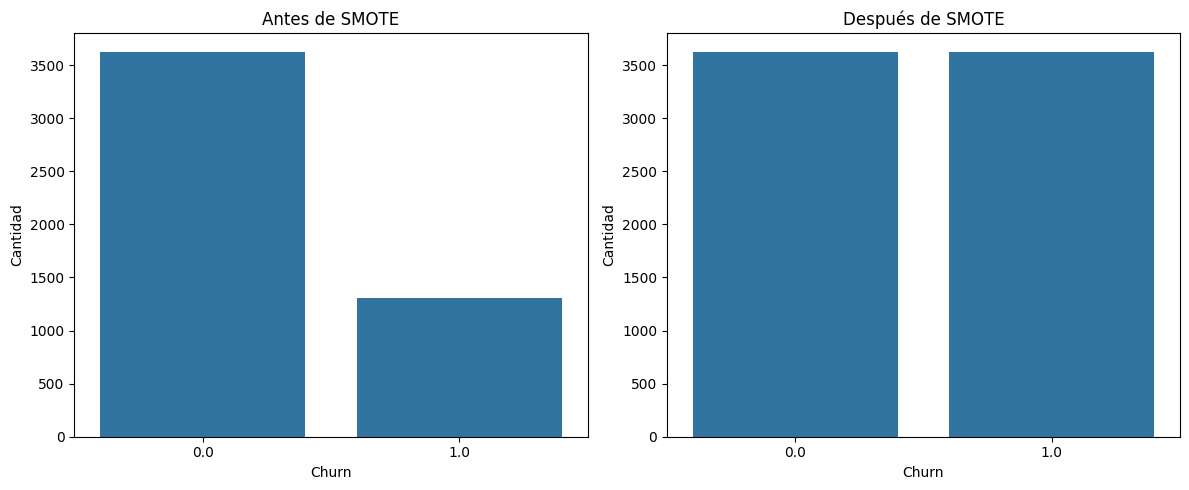

In [16]:
# crear una visualización para verificar el balanceo de las clases
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# antes 
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Antes de SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Cantidad")

# despues
sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("Después de SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

### Análisis de Correlación
##### Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.



In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   phone_MultipleLines                            6361 non-null   float64
 7   internet_DeviceProtection                      5517 non-null   float64
 8   internet_TechSupport                           5517 non-null   float64
 9   internet_StreamingTV                           5517 non-n

In [42]:
numericas = [ # extraer las columnas numéricas del df
    'Churn',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'customer_tenure',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling',
    'account_Charges.Monthly',
    'customer_gender_Male',
    'internet_InternetService_No',
    'internet_OnlineSecurity_Yes',
    'internet_OnlineBackup_Yes',
]

correlaciones = datos[numericas].corr() # aplicar el metodo corr() sobre las columnas numéricas
correlaciones

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges.Monthly,customer_gender_Male,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040207,-0.177125,-0.274422,-0.037057,-0.040132,0.191825,0.193356,-0.008612,-0.227890,-0.171226,-0.082255
customer_SeniorCitizen,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.153645,-0.011482,-0.135584,0.033852,0.050292,0.156530,0.220173,-0.001874,-0.182742,-0.038653,0.066572
customer_Partner,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.150238,0.188201,0.144218,0.155179,0.146401,-0.014877,0.096848,-0.001808,0.000615,0.143106,0.141498
customer_Dependents,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.026347,0.085130,0.137187,0.053502,0.024245,-0.111377,-0.113890,0.010517,0.139812,0.080972,0.023671
customer_tenure,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.360691,0.421932,0.372711,0.326901,0.335160,0.006152,0.247900,0.005106,-0.039062,0.327203,0.360277
phone_PhoneService,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,NaN,-0.006211,-0.041421,0.054675,0.043754,0.016505,0.247398,-0.006488,0.172209,-0.092893,-0.052312
phone_MultipleLines,0.040207,0.153645,0.150238,-0.026347,0.360691,NaN,1.000000,0.169818,0.057624,0.215971,0.222183,0.174347,0.456223,-0.007232,-0.273571,0.138060,0.239059
internet_DeviceProtection,-0.177125,-0.011482,0.188201,0.085130,0.421932,-0.006211,0.169818,1.000000,0.235716,0.276617,0.289019,-0.023632,0.321927,0.000232,NaN,0.170336,0.185155
internet_TechSupport,-0.274422,-0.135584,0.144218,0.137187,0.372711,-0.041421,0.057624,0.235716,1.000000,0.161478,0.162011,-0.088224,0.134233,-0.008620,NaN,0.273472,0.190586
internet_StreamingTV,-0.037057,0.033852,0.155179,0.053502,0.326901,0.054675,0.215971,0.276617,0.161478,1.000000,0.434754,0.117895,0.532439,-0.007315,NaN,0.043918,0.146935


In [43]:
correlaciones['Churn'].sort_values(ascending=False) # extraer la correlación de 'Churn' con cada columna y ordenarlar por mayor correlación

Churn                          1.000000
account_Charges.Monthly        0.193356
account_PaperlessBilling       0.191825
customer_SeniorCitizen         0.150889
phone_MultipleLines            0.040207
phone_PhoneService             0.011942
customer_gender_Male          -0.008612
internet_StreamingTV          -0.037057
internet_StreamingMovies      -0.040132
internet_OnlineBackup_Yes     -0.082255
customer_Partner              -0.150448
customer_Dependents           -0.164221
internet_OnlineSecurity_Yes   -0.171226
internet_DeviceProtection     -0.177125
internet_InternetService_No   -0.227890
internet_TechSupport          -0.274422
customer_tenure               -0.352229
Name: Churn, dtype: float64

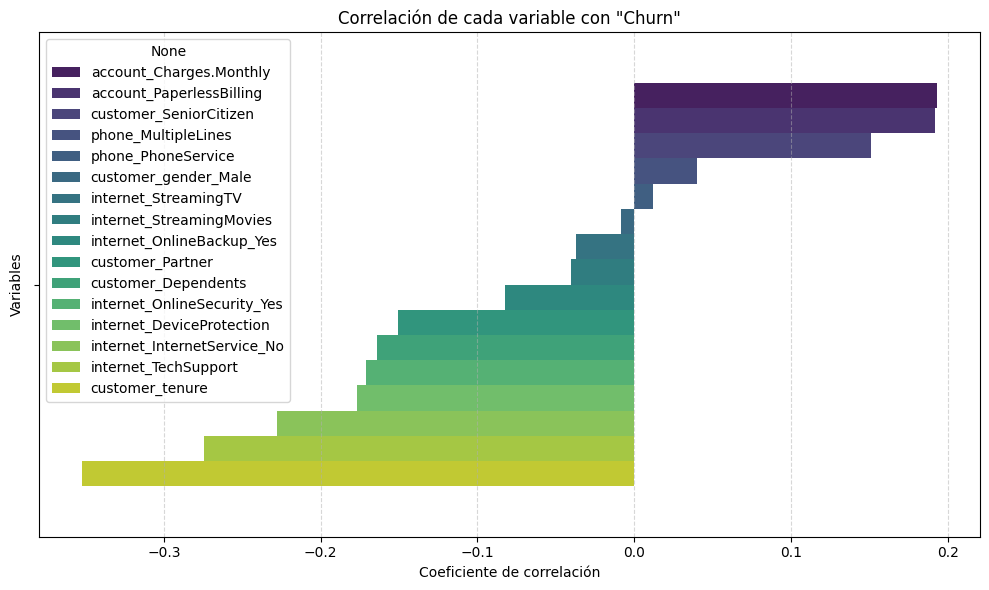

In [51]:
# extraer y ordenar las correlaciones con la variable 'Churn'
correlaciones_churn = correlaciones['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones_churn.values, hue=correlaciones_churn.index, palette='viridis')
plt.title('Correlación de cada variable con "Churn"')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()